# 3.3.3 6 Problemas típicos

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_excel('Motor Trend Car Road Tests.xlsx')
df

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [12]:
y = df['mpg']
x = df['hp']
X = sm.add_constant(x)

model = sm.OLS(y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Thu, 27 Nov 2025   Prob (F-statistic):           1.79e-07
Time:                        16:47:24   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.000      26.762      33.436
hp            -0.0682      0.010     -6.742      0.000      -0.089      -0.048
==============================================================================
Omnibus:                        3.692   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.158   Jarque-Bera (JB):                2.984
Skew:                           0.747   Prob(JB):                        0.225
Kurtosis:                       2.935   Cond. No.                         386.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Problema 1 No linealidad entre respuestas factores

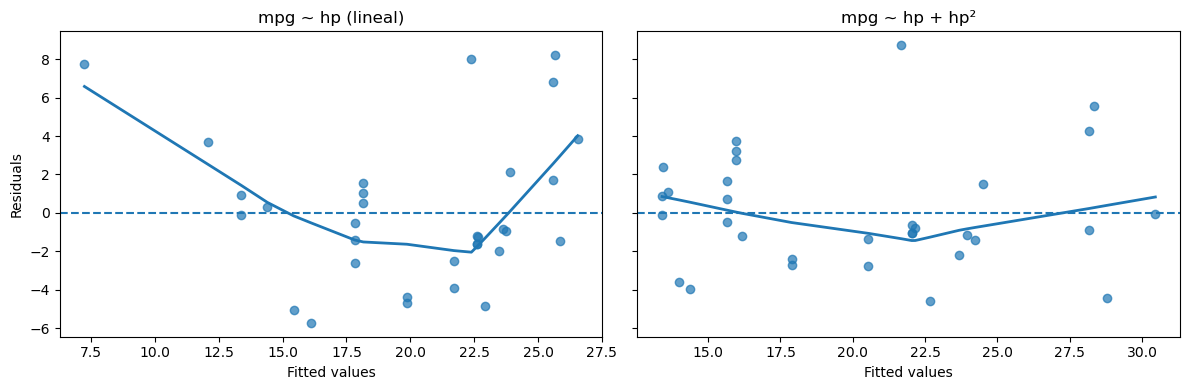

In [17]:
from statsmodels.nonparametric.smoothers_lowess import lowess
df["hp2"] = df["hp"] ** 2

X_lin = sm.add_constant(df["hp"])
mod_lin = sm.OLS(df["mpg"], X_lin).fit()
fitted_lin = mod_lin.fittedvalues
resid_lin = mod_lin.resid

X_quad = sm.add_constant(df[["hp", "hp2"]])
mod_quad = sm.OLS(df["mpg"], X_quad).fit()
fitted_quad = mod_quad.fittedvalues
resid_quad = mod_quad.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

axes[0].scatter(fitted_lin, resid_lin, alpha=0.7)
smooth_lin = lowess(resid_lin, fitted_lin, frac=0.8)
axes[0].plot(smooth_lin[:, 0], smooth_lin[:, 1], linewidth=2)
axes[0].axhline(0, linestyle="--")
axes[0].set_xlabel("Fitted values")
axes[0].set_ylabel("Residuals")
axes[0].set_title("mpg ~ hp (lineal)")

axes[1].scatter(fitted_quad, resid_quad, alpha=0.7)
smooth_quad = lowess(resid_quad, fitted_quad, frac=0.8)
axes[1].plot(smooth_quad[:, 0], smooth_quad[:, 1], linewidth=2)
axes[1].axhline(0, linestyle="--")
axes[1].set_xlabel("Fitted values")
axes[1].set_title("mpg ~ hp + hp²")

plt.tight_layout()
plt.show()

El gráfico de residuos vs valores ajustados muestra un claro patrón no lineal en el modelo mpg ~ hp. La curva LOWESS presenta una forma curvada, lo que indica que el modelo lineal no describe adecuadamente la relación entre el horsepower y las millas por galón.

Al incluir un término cuadrático (hp²), la curva suavizada se vuelve casi horizontal, lo que sugiere que el modelo cuadrático captura mejor la forma real de la relación.

Por lo tanto, existe evidencia de no linealidad en el modelo simple, y un modelo polinomial es más apropiado.

---

## Problema 2 Correlación en errores

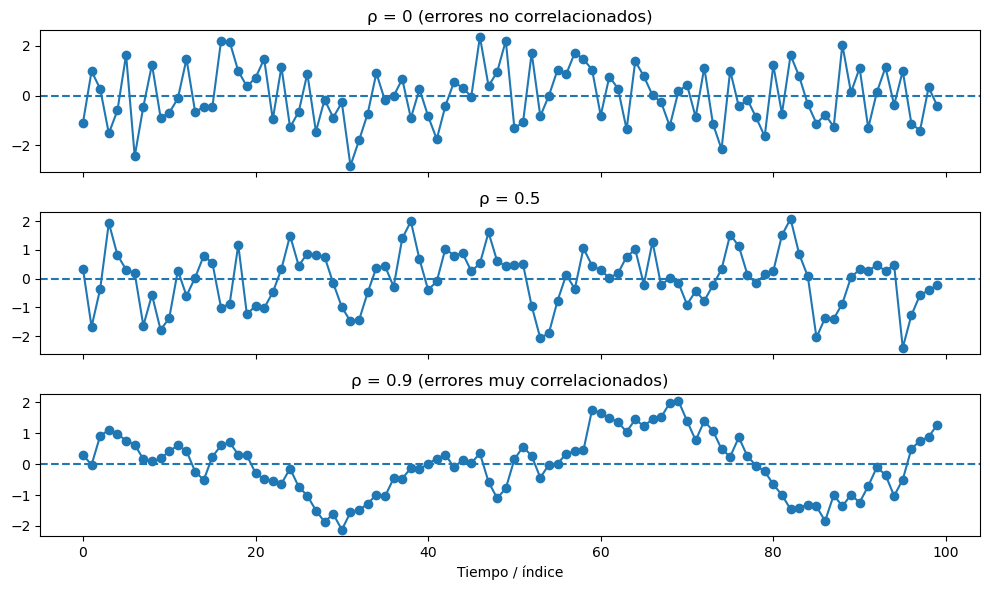

In [18]:
import numpy as np

np.random.seed(123)
n = 100
t = np.arange(n)

def sim_residuals(rho):
    x = np.linspace(0, 10, n)
    eps = np.zeros(n)
    eps[0] = np.random.normal()
    for i in range(1, n):
        eps[i] = rho * eps[i-1] + np.random.normal(scale=np.sqrt(1 - rho**2))
    y = 2 + 0.5 * x + eps
    X = sm.add_constant(x)
    mod = sm.OLS(y, X).fit()
    return mod.resid

resid_0   = sim_residuals(0.0)
resid_05  = sim_residuals(0.5)
resid_09  = sim_residuals(0.9)

# Gráficas tipo FIGURE 3.10
fig, axes = plt.subplots(3, 1, figsize=(10, 6), sharex=True)

axes[0].plot(t, resid_0, marker="o")
axes[0].axhline(0, linestyle="--")
axes[0].set_title("ρ = 0 (errores no correlacionados)")

axes[1].plot(t, resid_05, marker="o")
axes[1].axhline(0, linestyle="--")
axes[1].set_title("ρ = 0.5")

axes[2].plot(t, resid_09, marker="o")
axes[2].axhline(0, linestyle="--")
axes[2].set_title("ρ = 0.9 (errores muy correlacionados)")
axes[2].set_xlabel("Tiempo / índice")

plt.tight_layout()
plt.show()

El ejercicio muestra cómo la autocorrelación afecta el comportamiento de los errores en un modelo de regresión.
* Con ρ = 0, los residuos se comportan como ruido blanco, lo que cumple la suposición de independencia.
* Con ρ = 0.5, aparecen secuencias cortas de residuos positivos o negativos, indicando una dependencia moderada.
* Con ρ = 0.9, los residuos muestran largas trayectorias ascendentes y descendentes, evidenciando una fuerte autocorrelación.

Estos patrones visuales permiten diagnosticar rápidamente violaciones a la independencia de errores

---

## Problema 3 Varianza no constante en errores

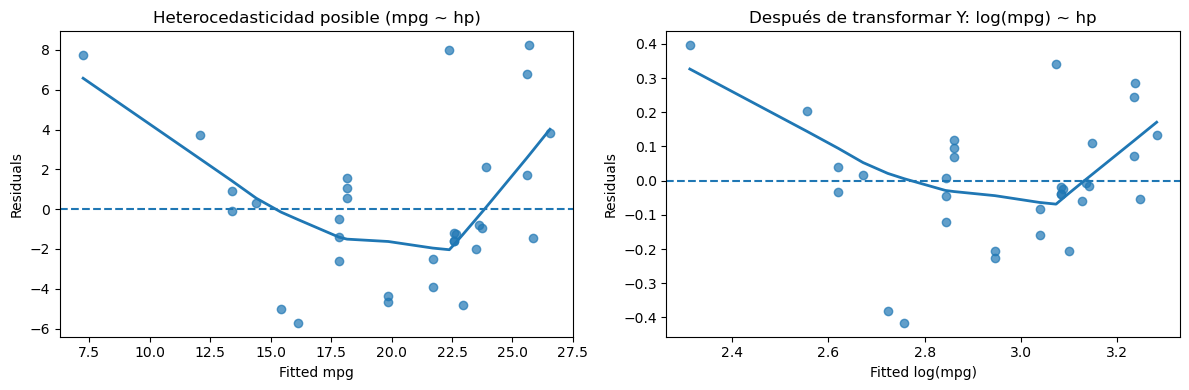

In [20]:
# Modelo original: mpg ~ hp
X_lin = sm.add_constant(df["hp"])
mod_lin = sm.OLS(df["mpg"], X_lin).fit()
fitted_lin = mod_lin.fittedvalues
resid_lin = mod_lin.resid

# Modelo transformado: log(mpg) ~ hp
df["log_mpg"] = np.log(df["mpg"])
X_log = sm.add_constant(df["hp"])
mod_log = sm.OLS(df["log_mpg"], X_log).fit()
fitted_log = mod_log.fittedvalues
resid_log = mod_log.resid

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

# Izquierda: residuals vs fitted (mpg)
axes[0].scatter(fitted_lin, resid_lin, alpha=0.7)
smooth1 = lowess(resid_lin, fitted_lin, frac=0.8)
axes[0].plot(smooth1[:, 0], smooth1[:, 1], linewidth=2)
axes[0].axhline(0, linestyle="--")
axes[0].set_xlabel("Fitted mpg")
axes[0].set_ylabel("Residuals")
axes[0].set_title("Heterocedasticidad posible (mpg ~ hp)")

# Derecha: residuals vs fitted (log(mpg))
axes[1].scatter(fitted_log, resid_log, alpha=0.7)
smooth2 = lowess(resid_log, fitted_log, frac=0.8)
axes[1].plot(smooth2[:, 0], smooth2[:, 1], linewidth=2)
axes[1].axhline(0, linestyle="--")
axes[1].set_xlabel("Fitted log(mpg)")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Después de transformar Y: log(mpg) ~ hp")

plt.tight_layout()
plt.show()

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
resid = model.resid
exog = model.model.exog

bp_test = het_breuschpagan(resid, exog)
lm_stat, lm_pvalue, f_stat, f_pvalue = bp_test

print("Breusch–Pagan Test Results:")
print(f"LM Statistic: {lm_stat:.4f}")
print(f"LM p-value:  {lm_pvalue:.4f}")
print(f"F Statistic:  {f_stat:.4f}")
print(f"F p-value:    {f_pvalue:.4f}")

Breusch–Pagan Test Results:
LM Statistic: 0.0493
LM p-value:  0.8243
F Statistic:  0.0463
F p-value:    0.8311


El gráfico de residuos vs valores ajustados para el modelo mpg ~ hp sugiere una posible heterocedasticidad, ya que la dispersión de los residuos no parece completamente constante y la curva LOWESS presenta una forma curvada. Sin embargo, al transformar la variable respuesta utilizando log(mpg), la curva suavizada se estabiliza y la variabilidad de los residuos se vuelve más uniforme, lo cual reduce la sospecha de varianza no constante.

Además, el test de Breusch–Pagan arrojó un p-value ≈ 0.82, lo que indica que no existe evidencia estadística significativa de heterocedasticidad. En conjunto, la evidencia visual y numérica sugiere que la transformación logarítmica mejora la estabilidad de los errores y hace al modelo más adecuado.

---

## Ejercicio 4 Outliers

Posible outlier: model         Maserati Bora
mpg                    15.0
hp                      335
stud_resid         2.568387
Name: 30, dtype: object


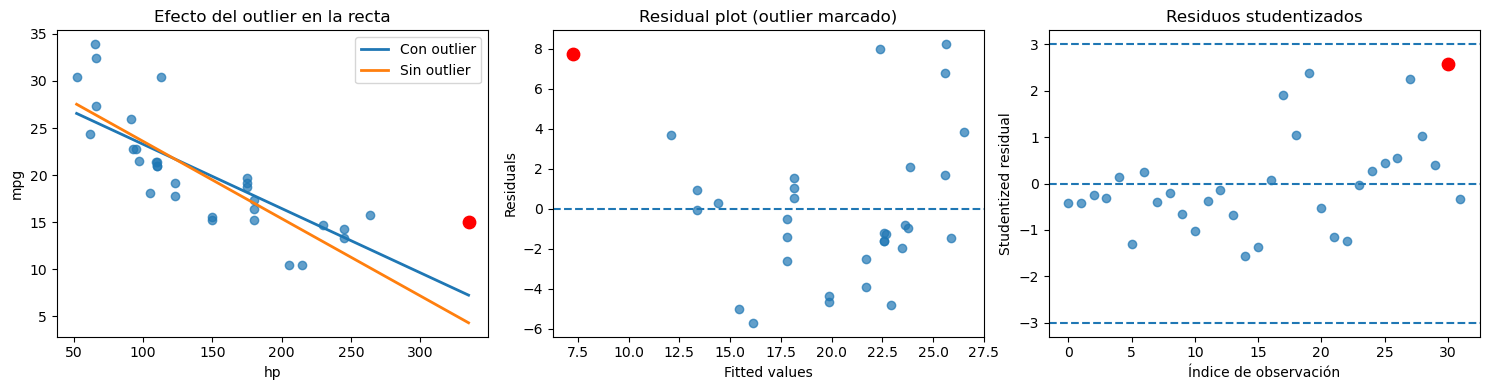

In [22]:
from statsmodels.stats.outliers_influence import OLSInfluence

X_lin = sm.add_constant(df["hp"])
mod_lin = sm.OLS(df["mpg"], X_lin).fit()
influence = OLSInfluence(mod_lin)

stud_resid = influence.resid_studentized_external
df["stud_resid"] = stud_resid

out_idx = np.argmax(np.abs(stud_resid))
print("Posible outlier:", df.loc[out_idx, ["model", "mpg", "hp", "stud_resid"]])

df_no_out = df.drop(index=out_idx)
X_no_out = sm.add_constant(df_no_out["hp"])
mod_no_out = sm.OLS(df_no_out["mpg"], X_no_out).fit()

hp_grid = np.linspace(df["hp"].min(), df["hp"].max(), 100)
X_grid = sm.add_constant(hp_grid)

y_pred_full = mod_lin.predict(X_grid)
y_pred_no_out = mod_no_out.predict(X_grid)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].scatter(df["hp"], df["mpg"], alpha=0.7)
axes[0].plot(hp_grid, y_pred_full, label="Con outlier", linewidth=2)
axes[0].plot(hp_grid, y_pred_no_out, label="Sin outlier", linewidth=2)
axes[0].scatter(df.loc[out_idx, "hp"], df.loc[out_idx, "mpg"], color="red", s=80)
axes[0].set_xlabel("hp")
axes[0].set_ylabel("mpg")
axes[0].set_title("Efecto del outlier en la recta")
axes[0].legend()

fitted_full = mod_lin.fittedvalues
resid_full = mod_lin.resid
axes[1].scatter(fitted_full, resid_full, alpha=0.7)
axes[1].scatter(fitted_full.iloc[out_idx], resid_full.iloc[out_idx], color="red", s=80)
axes[1].axhline(0, linestyle="--")
axes[1].set_xlabel("Fitted values")
axes[1].set_ylabel("Residuals")
axes[1].set_title("Residual plot (outlier marcado)")

axes[2].scatter(np.arange(len(stud_resid)), stud_resid, alpha=0.7)
axes[2].axhline(0, linestyle="--")
axes[2].axhline(3, linestyle="--")
axes[2].axhline(-3, linestyle="--")
axes[2].scatter(out_idx, stud_resid[out_idx], color="red", s=80)
axes[2].set_xlabel("Índice de observación")
axes[2].set_ylabel("Studentized residual")
axes[2].set_title("Residuos studentizados")

plt.tight_layout()
plt.show()

El análisis de residuos y rectas ajustadas identifica al Maserati Bora como un posible outlier en el modelo mpg ~ hp. Si bien su residuo studentizado (≈2.57) no supera el umbral convencional de ±3, su valor de horsepower es extremadamente alto comparado con el resto de las observaciones, y esto ejerce una influencia notable sobre la pendiente de la recta.

Al eliminar esta observación, la recta ajustada cambia de forma significativa, lo que indica que el punto tiene alta influencia. Asimismo, el residual plot muestra que el modelo predice mal este caso en particular.

En conjunto, la evidencia sugiere que el Maserati Bora es un outlier influyente que distorsiona el ajuste lineal y debe analizarse con cuidado en el modelo.

---

### Ejercicio 5 puntos palanca

Punto con mayor leverage: model       Maserati Bora
hp                    335
mpg                  15.0
leverage         0.274593
Name: 30, dtype: object


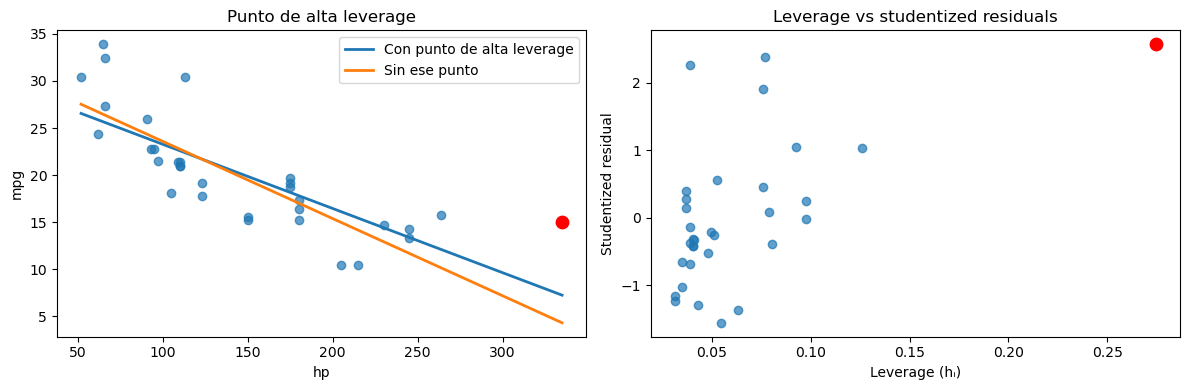

In [23]:
influence = OLSInfluence(mod_lin)
leverage = influence.hat_matrix_diag
df["leverage"] = leverage

lev_idx = np.argmax(leverage)
print("Punto con mayor leverage:", df.loc[lev_idx, ["model", "hp", "mpg", "leverage"]])

df_no_lev = df.drop(index=lev_idx)
X_no_lev = sm.add_constant(df_no_lev["hp"])
mod_no_lev = sm.OLS(df_no_lev["mpg"], X_no_lev).fit()

hp_grid = np.linspace(df["hp"].min(), df["hp"].max(), 100)
X_grid = sm.add_constant(hp_grid)
y_full = mod_lin.predict(X_grid)
y_no_lev = mod_no_lev.predict(X_grid)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df["hp"], df["mpg"], alpha=0.7)
axes[0].plot(hp_grid, y_full, label="Con punto de alta leverage", linewidth=2)
axes[0].plot(hp_grid, y_no_lev, label="Sin ese punto", linewidth=2)
axes[0].scatter(df.loc[lev_idx, "hp"], df.loc[lev_idx, "mpg"], color="red", s=80)
axes[0].set_xlabel("hp")
axes[0].set_ylabel("mpg")
axes[0].set_title("Punto de alta leverage")
axes[0].legend()

axes[1].scatter(leverage, stud_resid, alpha=0.7)
axes[1].scatter(leverage[lev_idx], stud_resid[lev_idx], color="red", s=80)
axes[1].set_xlabel("Leverage (hᵢ)")
axes[1].set_ylabel("Studentized residual")
axes[1].set_title("Leverage vs studentized residuals")

plt.tight_layout()
plt.show()

El análisis de la matriz de leverage identifica al Maserati Bora como un punto de alta leverage, con un valor hᵢ ≈ 0.275, que es muy superior al leverage promedio del modelo (≈ 0.0625). Esto lo convierte en un punto con capacidad de influir de manera desproporcionada en el ajuste de la recta de regresión.

Al comparar la recta ajustada con y sin este punto, se observa un cambio significativo en la pendiente, lo cual confirma su impacto en la estimación del modelo. Aunque su residuo studentizado no es extremo, su posición tan alejada del resto en el eje de hp lo vuelve altamente influyente.

En consecuencia, el Maserati Bora debe considerarse un punto de alta leverage que afecta de manera importante la forma de la recta, incluso si no es un outlier en términos de residuo.

---

## Ejercicio 6 Colinealidad

          drat      qsec      disp        wt
drat  1.000000  0.091205 -0.710214 -0.712441
qsec  0.091205  1.000000 -0.433698 -0.174716
disp -0.710214 -0.433698  1.000000  0.887980
wt   -0.712441 -0.174716  0.887980  1.000000


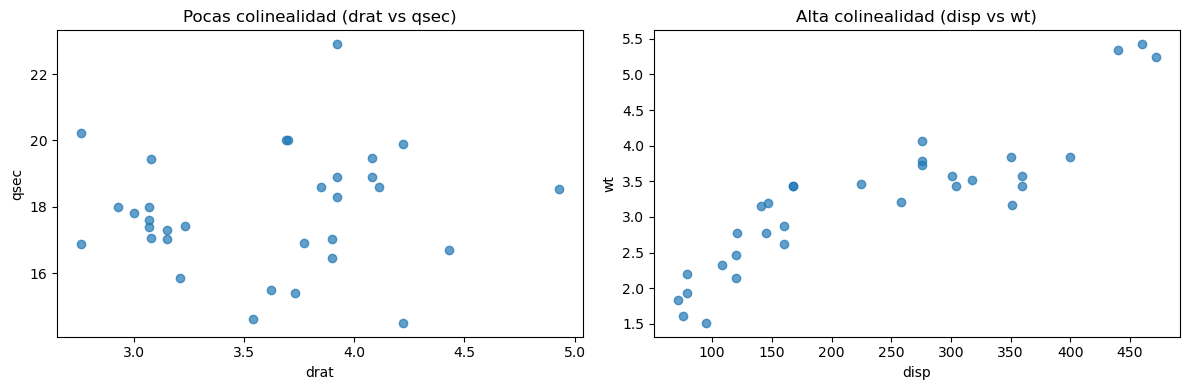

In [24]:
print(df[["drat", "qsec", "disp", "wt"]].corr())

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df["drat"], df["qsec"], alpha=0.7)
axes[0].set_xlabel("drat")
axes[0].set_ylabel("qsec")
axes[0].set_title("Pocas colinealidad (drat vs qsec)")

axes[1].scatter(df["disp"], df["wt"], alpha=0.7)
axes[1].set_xlabel("disp")
axes[1].set_ylabel("wt")
axes[1].set_title("Alta colinealidad (disp vs wt)")

plt.tight_layout()
plt.show()

A través de dos gráficos de dispersión se evalúa la presencia de colinealidad entre variables predictoras. En el primer caso, drat y qsec muestran una correlación prácticamente nula, con puntos totalmente dispersos, lo que indica poca colinealidad. En contraste, el par disp y wt presenta una correlación muy alta (≈0.89), con puntos alineados casi de manera lineal, lo que sugiere alta colinealidad entre estos predictores.

Esta comparación ilustra cómo la colinealidad puede identificarse visualmente y por qué puede representar un problema en modelos de regresión múltiple, al generar coeficientes inestables y dificultar la interpretación individual de cada variable.